# **Netflix Stock Price Prediction**

# 1. Business Understanding

# 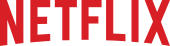



Netflix merupakan sebuah perusahaan *streaming* dan produsen film dari Amerika Serikat. Perusahaan yang sudah berdiri sejak 1997 ini memiliki jutaan pengguna di seluruh dunia dan sahamnya menjadi salah satu incaran para investor. Pengetahuan mengenai kinerja saham dari Netflix merupakan salah satu pertimbangan para investor untuk menanamkan uangnya. Dengan berbekal *dataset* *time-series* histori penjualan saham, maka dapat dilakukan prediksi harga saham di masa yang akan datang. Prediksi saham ini dilakukan dengan pemodelan Sarima

Pengimplementasian *data mining* ini berhubungan dengan menggali pengetahuan tentang harga saham Netflix. Dataset yang digunakan mempunyai data berisi tanggal, harga pembukaan, harga tertinggi, harga terendah, harga penutupan, harga penutupan yang disesuaikan, dan volume transaksi. Berdasarkan faktor tersebut, nantinya akan dicari faktor acuan yang mempengaruhi harga saham Netflix sebagai dasar perhitungan prediksi harga saham di masa yang akan datang.

Batasan-batasan dalam implementasi *data mining* pada aplikasi ini adalah:
1.	Tidak ada faktor luar di luar sumber data yang ikut menjadi atribut yang mempengaruhi proses implementasi *data mining* ini, seperti jumlah user, tren ekonomi, dan permintaan serta penawaran.
2.	Periode waktu yang cukup panjang, sehingga ruang lingkupnya dibatasi hanya periode sepuluh tahun terakhir yang digunakan pada proses *data mining*.

Sehingga, tujuan dilakukan *data mining* ini yaitu untuk mengetahui prediksi harga saham Netflix di masa yang akan datang berdasarkan data time-series tahun 2012-2022. Pengetahuan ini nantinya akan digunakan sebagai dasar pengambilan keputusan oleh investor apakah akan investasi pada saham ini atau tidak.


# 2. Data Understanding

## 2.1. Import Library and Dependencies

In [ ]:
import pandas as pd                   # Alias digunakan untuk mempermudah kita memanggil software library dan methods didalamnya
import numpy as np                    # Numpy adalah paket dasar untuk komputasi ilmiah di python
from pandas import Series  

import math
from math import sqrt                 # memanggil function sqrt, operasi matematika akar
import matplotlib.dates as mdates
from datetime import datetime    

import seaborn as sns                 # Adalah library visualisasi data di Python yg berdasarkan matplotlib
import matplotlib.pyplot as plty
from matplotlib import pyplot         # pyplot adalah sekumpulan fungsi dari matplotlib yang membuatnya bekerja seperti halnya MATLAB.
from matplotlib.pyplot import figure  # figure memberikan identifier unik untuk sebuah gambar grafik dari pyplot
import matplotlib.pyplot as plt       # matplotlib adalah library komprehensif untuk membuat visualisasi statis, animasi, maupun interaktif di Python
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k') # menetapkan format gambar grafik dg ukuran (16,12), dpi=80, facecolor=white, edgecolor=black
from matplotlib.pylab import rcParams # rc (runtime configuration) parameters, untuk merubah tampilan visual output matplotlib secara interaktif, 
                                        # (misal ubah warna, jenis garis untuk grafik dll)

import statsmodels.api as sm          # modul berisikan classes dan functions digunakan untuk estimasi model-model statistik, uji tes statistik, dan eksplorasi data.
import statsmodels.tsa.api as smt     # digunakan untuk mengakses Time-series models dan methods pd librari statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose #mengakses modul seasonal decompose pada modul time series analysis
from statsmodels.tsa.stattools import adfuller # mengakses function Augmented Dickey-Fuller unit root test. 
from statsmodels.tsa.arima_model import ARIMA  # mengakses function ARIMA
import statsmodels.formula.api as smf # digunakan untuk menentukan model dengan formula strings dan DataFrames.
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error 
     
import warnings                       # built-in modul untuk menghandle message dari issue warning, jika ada package yg obsolete
warnings.filterwarnings('ignore')     # filter untuk mengabaikan tipe warning
import sys                            # mengakses built-in function pada Python (args maupun keyword-args)
import itertools                      # digunakan iterasi pada struktur data yang dapat ditulis ulang menggunakan for-loop. 
                                        # Struktur data seperrti ini juga dikenal sebagai iterables
%matplotlib inline   

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 2.2. Load Data

> * Dataset : Netflix, Inc. (NFLX) dari tanggal  03-01-2012 sampai 22-04-2022
* Sumber dataset : Yahoo Finance
* Link dataset : 
https://finance.yahoo.com/quote/NFLX/

In [ ]:
# Memanggil data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
nflx = pd.read_csv('/content/drive/MyDrive/Ruangguru/Assign2/NFLX (1).csv')

In [ ]:
nflx = pd.read_csv('/content/NFLX.csv')

> Data Dictionary

| column | description |
| ------ | ----------- |
| `Date` | Tanggal (Format: Tahun-Bulan-Hari) |
| `Open` | Harga Pembukaan |
| `High` | Harga Tertinggi |
| `Low` | Harga Terendah |
| `Close` | Harga Penutupan |
| `Adj Close` | Harga penutupan yang disesuaikan dengan aksi korporasi seperti right issue, stock split atau stock reverse |
| `Volume` | Volume transaksi biasanya dalam jumlah lembar |

In [ ]:
# Melihat jumlah baris dan kolom
nflx.shape

(2594, 7)

In [ ]:
# Menampilkan nama kolom pada data
nflx.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
# drop columns yang tidak akan digunakan
nflx.drop(['Open', 'High', 'Low','Adj Close','Volume'], axis=1, inplace=True)

In [ ]:
# Cek kolom lagi
nflx.columns

Index(['Date', 'Close'], dtype='object')

In [ ]:
# Menampilkan 5 baris data teratas
nflx.head()

,Date,Close
0,2012-01-03,10.320000
1,2012-01-04,11.492857
2,2012-01-05,11.328571
3,2012-01-06,12.327143
4,2012-01-09,14.025714


In [ ]:
# Menampilkan 5 baris data terakhir
nflx.tail()

,Date,Close
2589,2022-04-18,337.859985
2590,2022-04-19,348.609985
2591,2022-04-20,226.190002
2592,2022-04-21,218.220001
2593,2022-04-22,215.520004


In [ ]:
# Menampilkan informasi statistik
nflx.describe().T

,count,mean,std,min,25%,50%,75%,max
Close,2594.0,217.513021,183.989511,7.685714,59.844642,142.345001,359.959999,691.690002


# 3. Data Preparation

In [ ]:
# Menampilkan info dari tiap variabel
nflx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2594 entries, 0 to 2593
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2594 non-null   object 
 1   Close   2594 non-null   float64
dtypes: float64(1), object(1)
memory usage: 40.7+ KB


In [ ]:
nflx.isna().sum()

Date     0
Close    0
dtype: int64

> * Dari informasi di atas, dapat dilihat bahwa tipe data variabel `Date` masih berbentuk `object` dan perlu diubah menjadi tipe `datetime`.
* Selain itu, kita juga mendapatkan informasi bahwa tidak ada missing value dari semua data variabel di atas.

In [ ]:
# Mengubah tipe data variabel "Date" menggunakan function pandas to_datetime()
nflx['Date']=pd.to_datetime(nflx['Date'], infer_datetime_format=True)

# Cek tipe data 
print (nflx.dtypes)

Date     datetime64[ns]
Close           float64
dtype: object


In [ ]:
# Set kolom 'Date' sebagai index
nflx=nflx.set_index(['Date'])
nflx.head()

,Close
Date,
2012-01-03,10.320000
2012-01-04,11.492857
2012-01-05,11.328571
2012-01-06,12.327143
2012-01-09,14.025714


## 3.1. Data Analysis

### 3.1.1. Time Series Plot

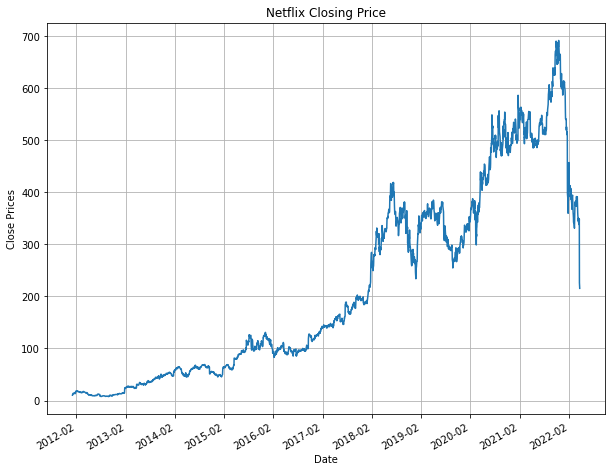

In [ ]:
# Time Series plot

fig, ax = plty.subplots(figsize=(10,8))
plty.xlabel("Date")
plty.ylabel("Close Prices")
plty.title("Netflix Closing Price")

half_year_locator = mdates.MonthLocator(interval = 12)
year_month_formatter = mdates.DateFormatter('%Y-%m')

ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_major_formatter(year_month_formatter)

ax.plot(nflx)
fig.autofmt_xdate()
plty.grid()
plty.show()

> **Insights:**

* Dari grafik di atas, dapat dilihat bahwa data dari harga penutupan saham Netflix memiliki pola tren yang meningkat selama kurun waktu lebih dari 11 tahun (Januari 2012 s/d April 2022).

### 3.1.2. Stationary Check - Augmented Dickey-Fuller (ADF) test

* ADF test dilakukan untuk uji stasioneritas di mana: 

  **H0:** *The time series is non-stationary. In other words, it has some time-dependent structure and does not have constant variance over time.*

 **H1:** *The time series is stationary.*

* Jika p-value test kurang dari significance level (contoh alpha = 0.05) dan nilai ADF test lebih kecil dibandingkan critical values maka kita dapat reject null hypothesis dan dapat menyimpulkan bahwa time series adalah stasioner.

In [ ]:
# Menggunakan function adfuller() yang diterapkan pada variabel 'Close'
# Supaya hasil uji lebih nyaman dibaca, maka kita buat series berdasarkan index 
nflxtest=adfuller(nflx['Close'], autolag='AIC')
nflxoutput=pd.Series(nflxtest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])

# Gunakan for loop untuk menaruh value dari dictionary dengan function items()
for key,value in nflxtest[4].items():
    nflxoutput['Critical Value (%s)'%key] = value

print('Dickey-Fuller Test: ')
print(nflxoutput)

if nflxtest[1] <= 0.05:
    print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary")
else:
    print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
          

Dickey-Fuller Test: 
Test Statistic            -1.289728
p-value                    0.633858
Lags Used                 22.000000
No. of Obs              2571.000000
Critical Value (1%)       -3.432896
Critical Value (5%)       -2.862665
Critical Value (10%)      -2.567369
dtype: float64
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


> **Insights:**

* Nilai ADF statistic/`t-value` yang didapatkan adalah `-1.289728`, yang berarti lebih besar dari critical values pada semua level;
* Kemudian `p-value` yang didapatkan adalah `0.633858`, yang berarti lebih besar dari 0.05;
* Keduanya menunjukkan gagal menolak null hypothesis pada tingkat keyakinan 90%, 95%, dan 99%, yang mengindikasikan bahwa **data time series ini strongly non-stationary.**

> Maka berdasarkan insights di atas, variance akan distabilkan dengan cara log transformation pada data NFLX dengan `np.log()`

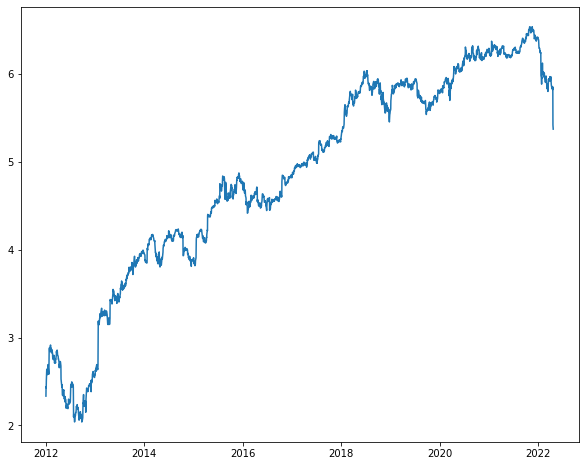

In [ ]:
# Plot dalam bentuk visualisasi line chart dengan menggunakan function numpy np.log
plt.figure(figsize=(10,8))
nflx_log=np.log(nflx) 
plt.plot(nflx_log)

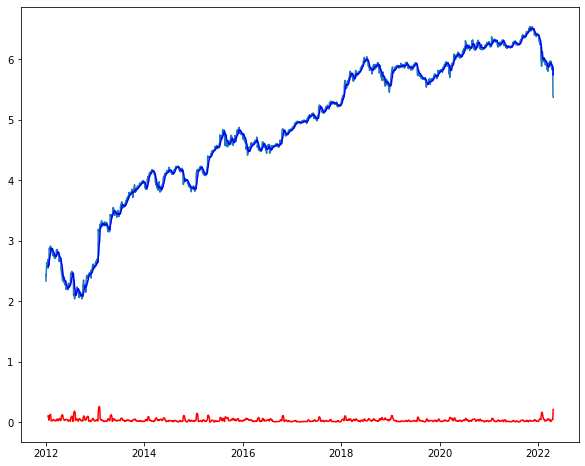

In [ ]:
# Cek secara visual kembali dengan plot nflx_log dengan rolling window mean dan std. deviation
plt.figure(figsize=(10,8))

MAvg=nflx_log.rolling(window=12).mean() 
MStd=nflx_log.rolling(window=12).std()

plt.plot(nflx_log)
plt.plot(MAvg, color='blue')
plt.plot(MStd, color='red')

In [ ]:
# Hitung difference dari nflx_log dengan MAvg
nflx_log_diff=nflx_log-MAvg

# Tampilkan 12 baris teratas dari nflx_log_diff
nflx_log_diff.head(12)

,Close
Date,
2012-01-03,NaN
2012-01-04,NaN
2012-01-05,NaN
2012-01-06,NaN
2012-01-09,NaN
2012-01-10,NaN
2012-01-11,NaN
2012-01-12,NaN
2012-01-13,NaN


In [ ]:
# Efek dari rolling di atas, maka akan ada value NaN, sehingga kita bisa lakukan dropna()
nflx_log_diff=nflx_log_diff.dropna() 
nflx_log_diff.head()

,Close
Date,
2012-01-19,0.137294
2012-01-20,0.078378
2012-01-23,0.000744
2012-01-24,-0.026064
2012-01-25,-0.008860


In [ ]:
# Buat function stationarity untuk menampilkan multiple line chart dari actual, rolling mean, dan rolling std.deviasi
# yang juga berisikan hasil tes dari Dickey-Fuller
def TestStationaryPlot(timeseries):
    
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    
    plt.figure(figsize=(10,8))
    actual=plt.plot(timeseries, color='red', label='Actual')
    mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
    std_6=plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    print('Dickey-Fuller Test: ')
    nflxtest=adfuller(timeseries['Close'], autolag='AIC')
    nflxoutput=pd.Series(nflxtest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
    for key,value in nflxtest[4].items():
        nflxoutput['Critical Value (%s)'%key] = value
    print(nflxoutput)

    if nflxtest[1] <= 0.05:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
              

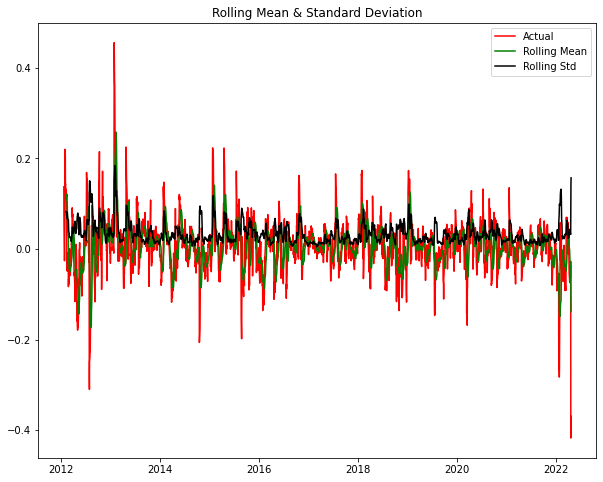

Dickey-Fuller Test: 
Test Statistic         -1.002255e+01
p-value                 1.664288e-17
Lags Used               1.800000e+01
No. of Obs              2.564000e+03
Critical Value (1%)    -3.432903e+00
Critical Value (5%)    -2.862668e+00
Critical Value (10%)   -2.567370e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


In [ ]:
# panggil function dan terapkan pada nflx_log_diff
TestStationaryPlot(nflx_log_diff)

> **Insights:**

* Dapat dilihat dari hasil Dickey-Fuller test di atas, series ini tidak stasioner dimana `p-value 1.664288 > 0.05` menunjukkan bahwa kita gagal menolak/menerima null hypothesis dan menyatakan bahwa series ini tidak stasioner.

* Juga pada `t-value (-1.002255) > semua level DF critical value` maka kita gagal menolak/menerima null hypothesis (H0) yang menyatakan pada series ini tidak stasioner. 

* Maka, kita dapat mencoba lagi dengan menggunakan Exponentially Weighted Moving Average (function `ewm`), karena melalui EWM kita dapat memberikan lebih banyak bobot kepada observasi terbaru, dengan kata lain dia akan memberikan bobot lebih sedikit terhadap data yang semakin jauh dari waktu kini, sehingga dia dapat menangkap tren terkini secara lebih cepat. 

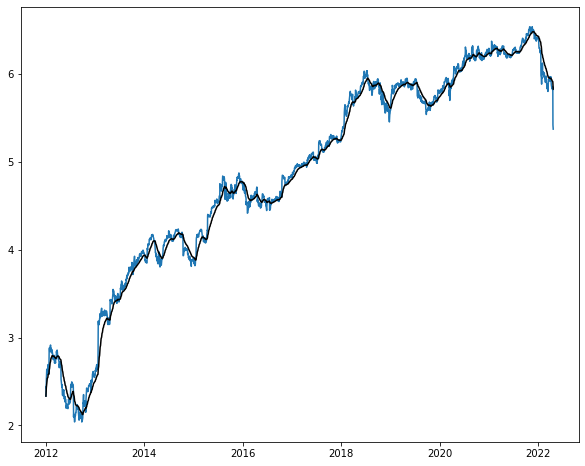

In [ ]:
# Visualisasikan ke dalam bentuk chart 
plt.figure(figsize=(10,8))

# Terapkan function ewm pada nflx_log melalui variable exp_nflx
exp_nflx=nflx_log.ewm(halflife=12, min_periods=0, adjust=True).mean() 

plt.plot(nflx_log)
plt.plot(exp_nflx, color='black')

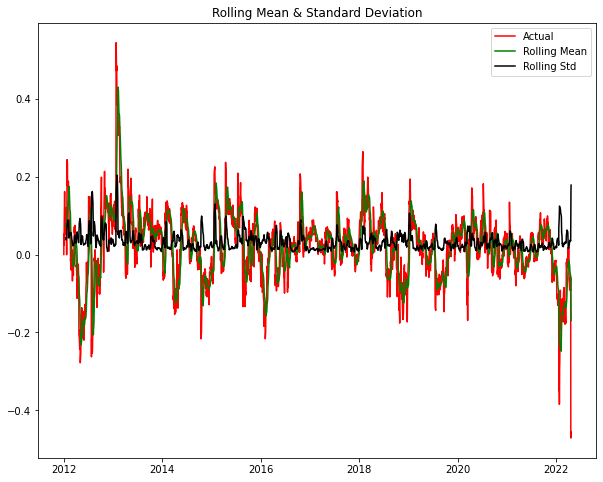

Dickey-Fuller Test: 
Test Statistic         -7.196789e+00
p-value                 2.422937e-10
Lags Used               5.000000e+00
No. of Obs              2.588000e+03
Critical Value (1%)    -3.432879e+00
Critical Value (5%)    -2.862657e+00
Critical Value (10%)   -2.567365e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


In [ ]:
# Hitung difference antara nflx_log dengan exp_nflx
exp_nflx_diff=nflx_log-exp_nflx

# Panggil function stationarity dan terapkan pada exp_nflx_diff
TestStationaryPlot(exp_nflx_diff)

> **Insights:**

Kita dapat melihat hasil melalui Dickey-Fuller test ini bahwa **nilai t-value (-7.196789) < DF critical value 1% (-3.432879)** maka kita dapat **reject null hypothesis**, dengan 90%, 95%, dan 99% tingkat keyakinan menyatakan bahwa series ini sudah stasioner.

### 3.1.3. Stationarity Check - Shift Test

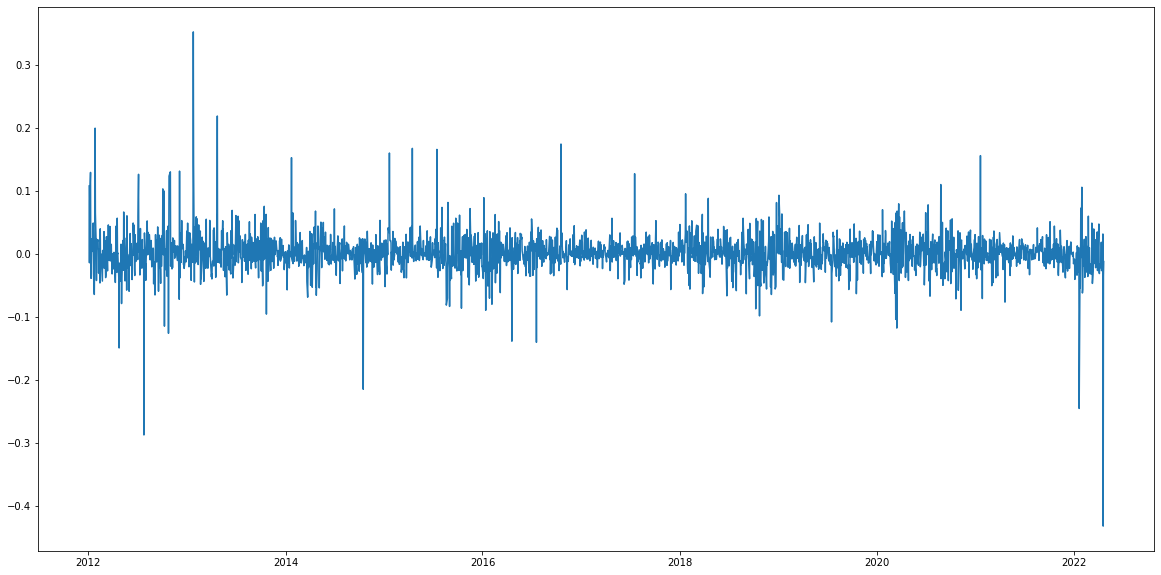

In [ ]:
# Buat format ukuran chart
plt.figure(figsize=(20,10))

# Terapkan shift terhadap data yang telah diterapkan transformasi log di cell sebelumnya
nflx_shift=nflx_log-nflx_log.shift() 

# Tampilkan chart
plt.plot(nflx_shift)

In [ ]:
# Check missing value
nflx_shift.isna().sum()

Close    1
dtype: int64

In [ ]:
# Lakukan dropna 
nflx_shift=nflx_shift.dropna()

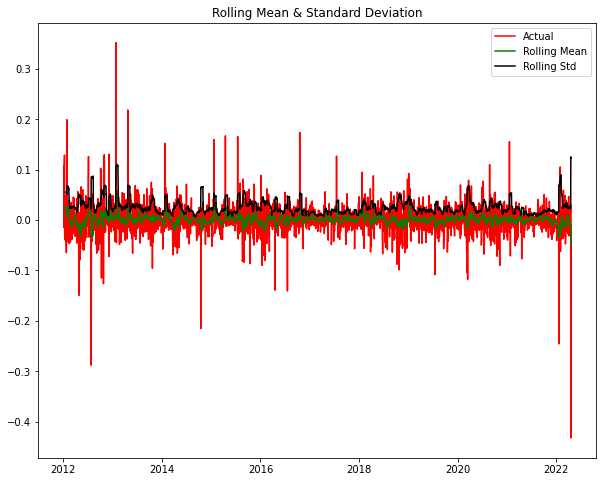

Dickey-Fuller Test: 
Test Statistic           -48.916579
p-value                    0.000000
Lags Used                  0.000000
No. of Obs              2592.000000
Critical Value (1%)       -3.432875
Critical Value (5%)       -2.862656
Critical Value (10%)      -2.567364
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


In [ ]:
#Panggil function stationarity dan terapkan pada nflx_shift yang sudah dibersihkan dari NA value
TestStationaryPlot(nflx_shift)

> **Insights:**

Kita dapat melihat hasil melalui Shift test ini bahwa **nilai t-value (-48.916579) < DF critical value 1% (-3.432879)** maka kita dapat **reject null hypothesis**, dengan 90%, 95%, dan 99% tingkat keyakinan menyatakan bahwa series ini sudah stasioner.

### 3.1.4. Auto Correlation Function and Partial Auto Correlation Function

Text(0.5, 1.0, 'Partial Autocorrelation Function / PACF')

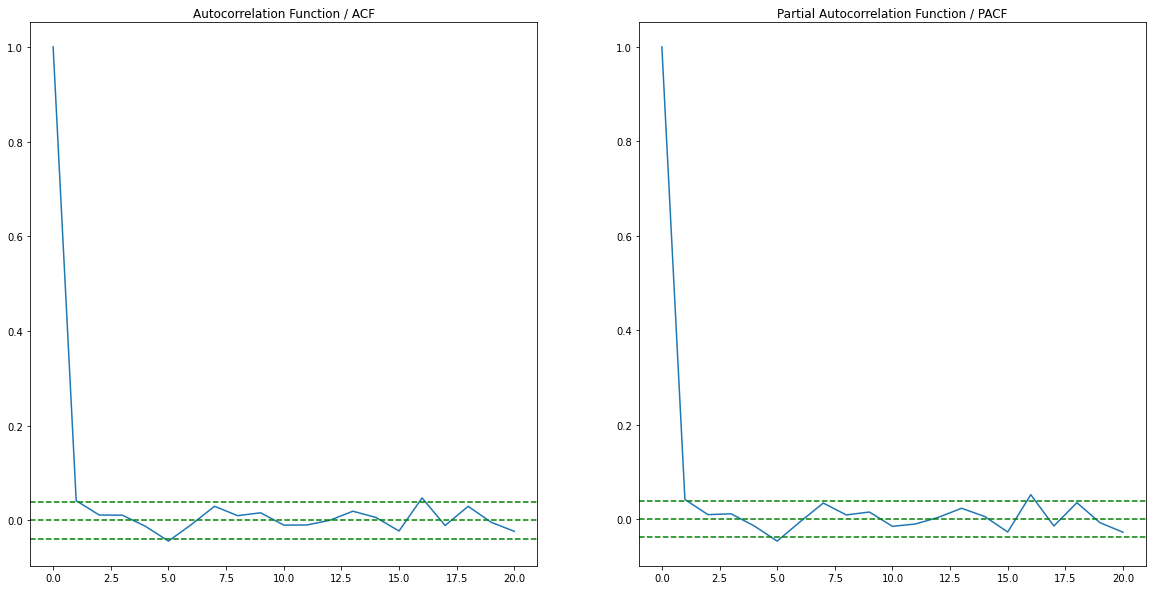

In [ ]:
# dari module time series analysis, import function acf dan pacf
# ACF = Auto Correlation Function
# PACF = Partial Auto Correlation Function
from statsmodels.tsa.stattools import acf, pacf 

# terapkan function acf dan pcf pada nflx_shift yang sudah dibuat
lag_acf=acf(nflx_shift, nlags=20)
lag_pacf=pacf(nflx_shift, nlags=20, method='ols')

# Format grafik dan visualisasikan ACF
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(nflx_shift)),linestyle='--',color='green') # y = -0.16
plt.axhline(y=1.96/np.sqrt(len(nflx_shift)),linestyle='--',color='green') # y = 0.16
plt.title('Autocorrelation Function / ACF')

# Format grafik dan visualisasikan PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(nflx_shift)),linestyle='--',color='green') # y = -0.16
plt.axhline(y=1.96/np.sqrt(len(nflx_shift)),linestyle='--',color='green') # y = 0.16
plt.title('Partial Autocorrelation Function / PACF')

> **Interpretation:**

* Fungsi ACF dan PCF membantu kita dengan melakukan plot korelasi antara time series dan lag series dengan tingkat keyakinan 95% ditandai dengan garis hijau putus-putus. 

* Dari grafik di atas terlihat bahwa grafik time series (berwarna biru) berpotongan dengan grafik shift time series (dengan lag=20) baik pada batas atas maupun bawah, sehingga dapat dikatakan bahwa grafik time series ini mengalami efek auto correlation. 

# 4. Modeling

## 4.1 ARIMA

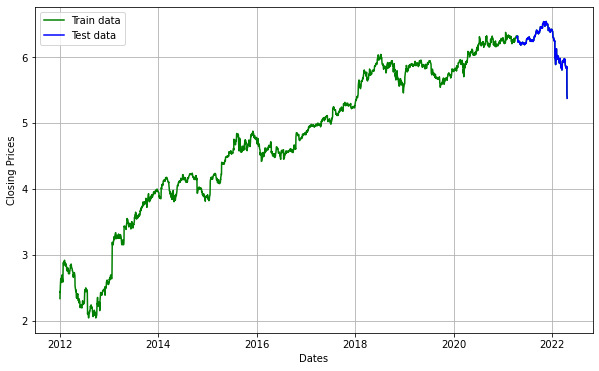

In [ ]:
# split data into train and training set
train_data, test_data = nflx_log[3:int(len(nflx_log)*0.9)], nflx_log[int(len(nflx_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(nflx_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-9714.106, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-9714.639, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-9714.600, Time=0.81 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-9709.243, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-9712.757, Time=1.52 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-9712.706, Time=1.63 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-9711.189, Time=1.42 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-9710.217, Time=0.34 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 6.232 seconds
                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                 2331
Model:               SARIMAX(1, 1, 0)   Log Likelihood                4860.319
Date:                Wed, 27 Apr 2022   AIC                          -9714.639
Time:                       

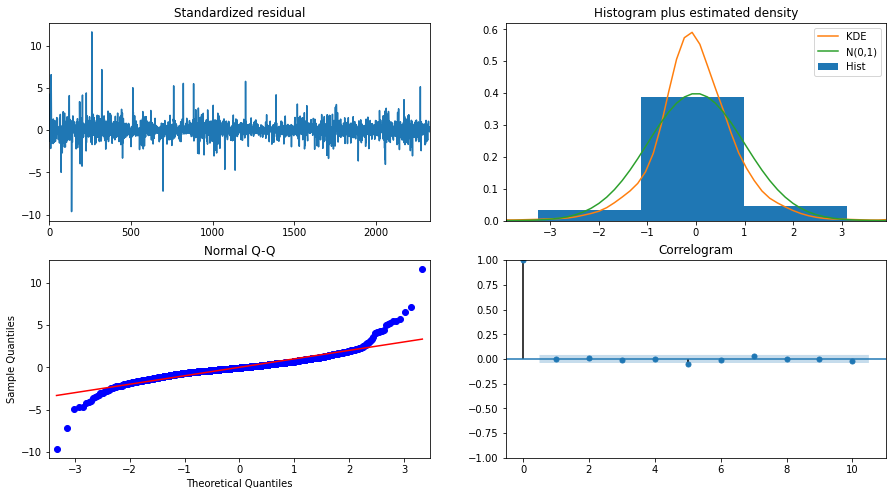

In [ ]:
!pip install pmdarima
# Memprediksi best perfom arima
from pmdarima.arima import auto_arima
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [ ]:
# Modeling
# Build Model
model = ARIMA(train_data, order=(1,1,0))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 2330
Model:                 ARIMA(1, 1, 0)   Log Likelihood                4860.320
Method:                       css-mle   S.D. of innovations              0.030
Date:                Wed, 27 Apr 2022   AIC                          -9714.639
Time:                        13:07:45   BIC                          -9697.378
Sample:                             1   HQIC                         -9708.350
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0016      0.001      2.539      0.011       0.000       0.003
ar.L1.D.Close     0.0331      0.021      1.592      0.112      -0.008       0.074
                                    Root

In [ ]:
# Forecast
fc, se, conf = fitted.forecast(260, alpha=0.05)  # 95% conf

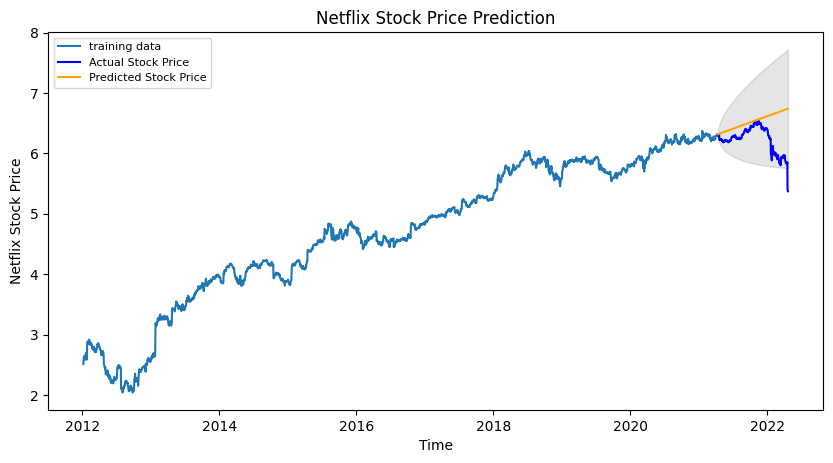

In [ ]:
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training data')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Netflix Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Netflix Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# 5. Evaluation

In [ ]:
# report performance
mse = mean_squared_error(test_data, fc)
print('MSE : '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE : '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = mean_absolute_percentage_error(test_data, fc)
print('MAPE: '+str(mape))

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MSE : 0.17613624855266594
MAE : 0.30136855173902805
RMSE: 0.4196858927253404
MAPE: 5.179035970151199


# 6. Deployment

Pada Tahap Deployment dilakukan beberapa hal yaitu:
- Mengambil hasil dan menyimpulkan strategi untuk penyebaran
- Menghasilkan Presentasi dan Dokumentasi

# 7. Kesimpulan

> Dari hasil pembahasan dan analisa yang telah dilakukan, maka didapatkan kesimpulan bahwa :
* Metode ARIMA dapat digunakan untuk meramalkan harga saham pada Netflix. Model terbaik yang digunakan berdasarkan pengujian yang dilakukan ialah ARIMA (1,1,0).
* Pada tahun berikutnya diperkirakan harga saham Netflix akan mengalami sedikit penurunan. 